# Perceptron: the simplest variation
<div class = "alert alert-block alert-info">Note: here a little inheritance trick is used in order to document Perceptron class.</div><br>
## About
This is just a simple implementation of PLA as seen on Caltech Machine Learning lecture 1 by Professor Yaser Abu-Mostafa<br>
https://www.youtube.com/watch?v=mbyG85GZ0PI&t=1288s

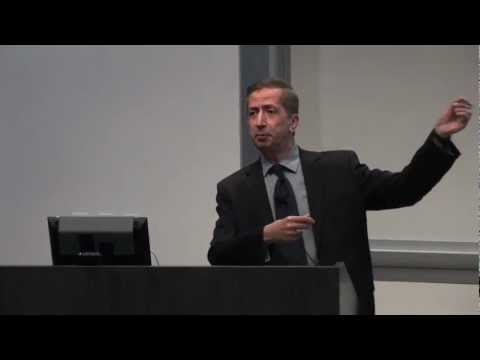

In [24]:
from IPython.display import YouTubeVideo
from datetime import timedelta
start=int(timedelta(hours=0, minutes=23, seconds=25).total_seconds())
YouTubeVideo("mbyG85GZ0PI", start=start, autoplay=0, theme="light", color="red")

This is a very simple model that solves a binary classification problem. We have 2 classes, -1 and 1, and a set of $k$-dimensional data points.

## Input
Input is a training set, which is labeled set of input-output pairs $\mathcal{D} = \{(x_i,y_i)\}_{i=1}^N$, where $N$ is the number of training examples and $\mathcal{D}$ is called a **training set**. This is the simplest setting, so:
- Each training input $x_i$ is a $k$-dimensional vector of features. Values of $x_i$ must be numeric (real or integer - no matter).
- Response is a $N$-dimensional vector where each $y_i\in\{1...C\}$. In our case, $y_i\in\{-1, 1\}$ which indicates that each $x_i$ is mapped to one of 2 classes.

## Algorithm
As shown in the picture above, we add a "special feature" to every $x_i$ - it is a constant $x_{i0}=1$ and add a special weight $w_0$ to weight vector (which is called bias, intercept, etc.) which allows us to write hypothesis (predicted value) as $h(\mathbf{x})=sign(\sum_{i=0}^k w_i x_i)$ for each vector $\mathbf{x}$.
![PictureHere](img/formula1.png)

In [25]:
# NumPy
import numpy as np

# Plotting
from matplotlib import pyplot as plt
import time
import pylab as pl
from IPython import display
%matplotlib inline

# Randomizing
from random import randint

# Comparing with scikit-learn perceptron model
import sklearn.linear_model

# Train and test sets
from sklearn.model_selection import train_test_split

# For inheritence purposes
from abc import ABCMeta, abstractmethod

Firs of all we create a method to initiate our Perceptron class. It will get maximum number of iterations and a 'verbose' parameter.

In [26]:
class Perceptron():
    @abstractmethod
    def __init__(self, n_iter=100, verbose=False):
        self.n_iter = n_iter
        self.X = np.empty(shape=1)
        self.y = np.empty(shape=1)
        self.coef_ = np.empty(shape=1)
        self.intercept_ = 0
        self.verbose = verbose

Now we define the function to fit our model to training set - the **fit()** function.

In [27]:
class Perceptron(Perceptron):
    
    @abstractmethod
    def fit(self, X_train, y_train):
        self.X = np.array(X_train)
        self.y = np.array(y_train)
        # 1. Pick random weights and add w0 (intercept) to weights:
        self.coef_ = np.random.randn(len(self.X[0]) + 1)
        # 2. Add constant x0=1 to all rows in X:
        self.X = np.insert(self.X, 0, 1, axis=1)
        # 3. Iterate for n_iter times or until convergence:
        iter_no = 0
        while iter_no < self.n_iter:
            # Perform w(T)X to get predictions vector:
            y_pred = np.sign(np.dot(self.X, self.coef_))
            # On predictions vector, pick a misclassified point:
            converged = True
            for y_hat_i, y_i, x_i in zip(y_pred, self.y, self.X):
                if y_hat_i != y_i:
                    # Correct weight for that point and break the loop:
                    converged = False
                    self.coef_ = self.coef_ + np.dot(x_i, y_i)
                    break
            # If no misclassified points found - STOP (convergence detected):
            if converged:
                if self.verbose:
                    print("Fitting: converged within", iter_no+1, "steps.")
                break
            # Iterate further:iter_no
            iter_no += 1
        self.intercept_ = self.coef_[0]

Let us now define a predicting method:

In [28]:
class Perceptron(Perceptron):
    
    @abstractmethod
    def predict(self, X):
        self.X = np.array(X)
        self.X = np.insert(self.X, 0, 1, axis=1)
        res = np.sign(np.dot(self.X, self.coef_))
        return res.astype(int)

And a very simple scoring method:

In [29]:
class Perceptron(Perceptron):
    
    @abstractmethod
    def score(self, X_test, y_test):
        # 1. Get a prediction:
        y_pred = self.predict(X_test)
        # 2. Compare results:
        match_counter = 0
        for y_pred_i, y_i in zip(y_pred, y_test):
            if y_pred_i == y_i:
                match_counter += 1
        return match_counter / len(y_test)

<br><br>
## Testing
We shall test this class on 2 cases: lineary separable data and unknown data (which is not necessarily lineary separable).

### Lineary separable data
Now we can check our Perceptron class on a simple data. Let's say we have some dataset which is lineary separable (one of possible ways to separate 2 classes is via $y=x-2$).<br>
In this cas data is guaranteed to be lineary separable because it is designed this way: in a random array of dots, every dot that lies above $y=x-2$ curve is going to class *+1*, every dot below the curve is going to class *-1*, and every dot that happens to lie on the curve itself gets "tossed" a little bit higher via incrementing its $y$ coordinate by one, and then it naturally falls into class *+1*. So all the data we have is guaranteed to be lineary separable in this case. 

Fitting: converged within 50 steps.
This Perceptron test score = 1.0
Weights are: [-28.29706071  34.13393496] ; intercept = 25.8658997675
SK-learn Perceptron test score = 1.0
Weights are: [[-18.  22.]] ; intercept = [ 20.]


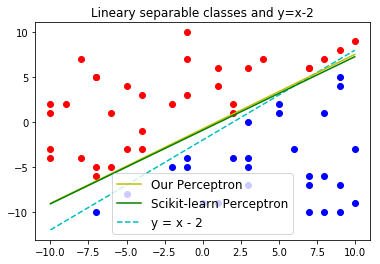

In [30]:
# 1. Creating dataset: X and y
X = []
y = []
for i in range(0, 60):
    X.append([randint(-10, 10), randint(-10, 10)])

# Case of y = x - 2
for index, point in enumerate(X):
    if point[1] > point[0] - 2:
        plt.plot(point[0], point[1], 'ro')
        y.append(1)
    elif point[1] < point[0] - 2:
        plt.plot(point[0], point[1], 'bo')
        y.append(-1)
    else:
        X[index][1] += 1
        plt.plot(point[0], point[1], 'ro')
        y.append(1)
plt.title("Lineary separable classes and y=x-2")

# Train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=45, test_size=15)

# Prediction: this Perceptron
p = Perceptron(verbose=True)
p.fit(X_train, y_train)
print("This Perceptron test score =", p.score(X_test, y_test))
print("Weights are:", p.coef_[1:], "; intercept =", p.coef_[0])

# Prediction: scikit-learn Perceptron
sk_p = sklearn.linear_model.Perceptron(max_iter=100)
sk_p.fit(X_train, y_train)
print("SK-learn Perceptron test score =", sk_p.score(X_test, y_test))
print("Weights are:", sk_p.coef_, "; intercept =", sk_p.intercept_)

# Plotting boundaries:
x = np.linspace(-10, 10, 10)
sample_boundary, = plt.plot(x, x-2, 'c--', label='y = x - 2')
our_p_boundary,  = plt.plot(x, -1*((p.coef_[0] + x*p.coef_[1])/(p.coef_[2])), 
                            'y-', label='Our Perceptron')
sk_p_boundary,   = plt.plot(x, -1*((sk_p.intercept_[0] + x*sk_p.coef_[0][0])/(sk_p.coef_[0][1])), 
                            'g-', label='Scikit-learn Perceptron')

# Setting up a legend and tuning figure size: 
plt.rcParams["figure.figsize"] = [12, 9]
plt.legend(handles=[our_p_boundary, sk_p_boundary, sample_boundary], prop={'size': 12})
plt.show()

### Visualization on lineary separable data
Let's write a simple method that visualizes fitting steps:

In [31]:
class Perceptron(Perceptron):
    
    @abstractmethod
    def fit_and_plot(self, X_train, y_train, plt, sleep_time=0.3):
        """
        Only for 2D arrays! Meaning, X.shape=(k,2)
        """
        self.X = np.array(X_train)
        self.y = np.array(y_train)
        # 0. Get data points ready for plotting:
        xs = np.array([point[0] for point in self.X])
        ys = np.array([point[1] for point in self.X])
        classes = np.array(self.y)
        classes[classes < 0] = 0
        colormap = np.array(['r', 'k'])
        lin_x = np.linspace(-11, 11, 10)
        # 1. Pick random weights and add w0 (intercept) to weights:
        self.coef_ = np.random.randn(len(self.X[0]) + 1)
        # 2. Add constant x0=1 to all rows in X:
        self.X = np.insert(self.X, 0, 1, axis=1)
        # 3. Iterate for n_iter times or until convergence:
        iter_no = 0
        while iter_no < self.n_iter:
            # Perform w(T)X to get predictions vector:
            y_pred = np.sign(np.dot(self.X, self.coef_))
            # On predictions vector, pick a misclassified point:
            converged = True
            for y_hat_i, y_i, x_i in zip(y_pred, self.y, self.X):
                if y_hat_i != y_i:
                    # Correct weight for that point and break the loop:
                    converged = False
                    self.coef_ = self.coef_ + np.dot(x_i, y_i)
                    break
            # -----------------------------------------
            # Plotting here.
            # Set axis limits and lock it:
            pl.clf()
            pl.title("Fitting step:" + str(iter_no))
            pl.xlim(-11, 11)
            pl.ylim(-11, 11)
            pl.autoscale(False)
            # Plot data points:
            pl.scatter(xs, ys, c=colormap[classes], s=40)
            # Plot decision boundary:
            pl.plot(lin_x, -1*((self.coef_[0] + lin_x*self.coef_[1])/(self.coef_[2])), 'g-')
            # Refresh display and sleep:
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(sleep_time)
            # -----------------------------------------
            # If no misclassified points found - STOP (convergence detected):
            if converged:
                if self.verbose:
                    print("Fitting: converged within", iter_no+1, "steps.")
                break
            # Iterate further:iter_no
            iter_no += 1
        self.intercept_ = self.coef_[0]

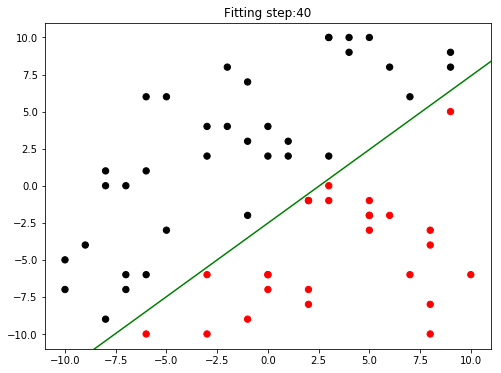

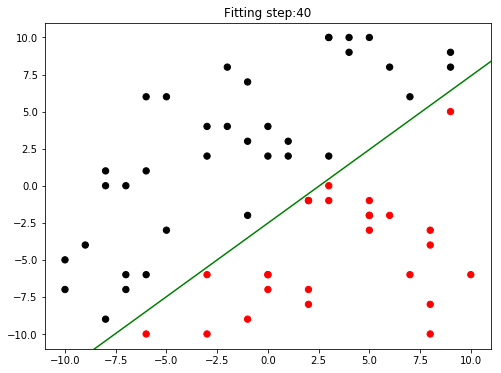

In [33]:
plt.rcParams["figure.figsize"] = [8, 6]

# 1. Creating dataset: X and y
X = []
y = []
for i in range(0, 60):
    X.append([randint(-10, 10), randint(-10, 10)])
    
# Case of y = x - 2
for index, point in enumerate(X):
    if point[1] > point[0] - 2:
        y.append(1)
    elif point[1] < point[0] - 2:
        y.append(-1)
    else:
        X[index][1] += 1
        y.append(1)

p = Perceptron()
p.fit_and_plot(X, y, plt)

### Visualization on unknown data
Now data provided is not necessarily lineary separable.

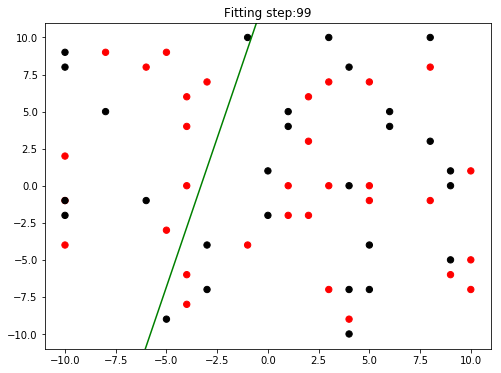

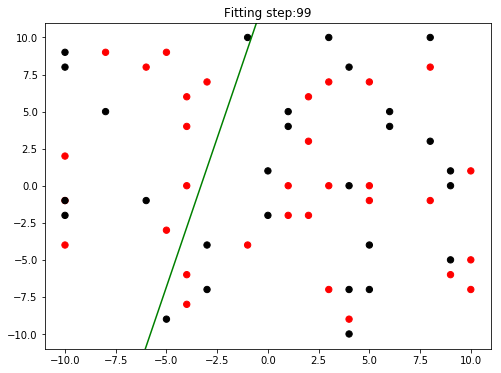

In [34]:
import random

X = []
y = []
all_classes = [-1, 1]
for i in range(0, 60):
    X.append([randint(-10, 10), randint(-10, 10)])
    y.append(random.choice(all_classes))
    
p = Perceptron()
p.fit_and_plot(X, y, plt, sleep_time=0.1)

In [35]:
print("This Perceptron test score =", p.score(X_test, y_test))
print("Weights are:", p.coef_[1:], "; intercept =", p.coef_[0])

sk_p = sklearn.linear_model.Perceptron(max_iter=100)
sk_p.fit(X, y)
print("SK-learn Perceptron test score =", sk_p.score(X_test, y_test))
print("Weights are:", sk_p.coef_, "; intercept =", sk_p.intercept_)

This Perceptron test score = 0.6666666666666666
Weights are: [-8.73852034  2.17696852] ; intercept = -28.8422059776
SK-learn Perceptron test score = 0.866666666667
Weights are: [[-5.  6.]] ; intercept = [-4.]


<br><br>
## Appendix
Code for a short Perceptron class.

In [36]:
import numpy as np


class Perceptron:

    def __init__(self, n_iter=100, verbose=False):
        self.n_iter = n_iter
        self.X = np.empty(shape=1)
        self.y = np.empty(shape=1)
        self.coef_ = np.empty(shape=1)
        self.intercept_ = 0
        self.verbose = verbose

    def fit(self, X_train, y_train):
        self.X = np.array(X_train)
        self.y = np.array(y_train)
        # 1. Pick random weights while adding w0 for intercept:
        self.coef_ = np.random.randn(len(self.X[0]) + 1)
        # 2. Add x0 as 1 to all rows in X:
        self.X = np.insert(self.X, 0, 1, axis=1)

        # 3. Iterate for n_iter times:
        iter_no = 0
        while iter_no < self.n_iter:
            # Perform w(T)X to get predictions vector:
            y_pred = np.sign(np.dot(self.X, self.coef_))
            # 4. On predictions vector, pick a misclassified point:
            converged = True
            for y_hat_i, y_i, x_i in zip(y_pred, self.y, self.X):
                if y_hat_i != y_i:
                    # Correct weight for that point and break the loop:
                    converged = False
                    self.coef_ = self.coef_ + np.dot(x_i, y_i)
                    break
            # 5. If no misclassified points found - stop:
            if converged:
                if self.verbose:
                    print("Fitting: converged within", iter_no+1, "steps.")
                break
            # 6. Iterate further:iter_no
            iter_no += 1
        self.intercept_ = self.coef_[0]

    def predict(self, X):
        self.X = np.array(X)
        self.X = np.insert(self.X, 0, 1, axis=1)
        res = np.sign(np.dot(self.X, self.coef_))
        return res.astype(int)

    def score(self, X_test, y_test):
        # 1. Get a prediction:
        y_pred = self.predict(X_test)
        # 2. Compare results:
        match_counter = 0
        for y_pred_i, y_i in zip(y_pred, y_test):
            if y_pred_i == y_i:
                match_counter += 1
        return match_counter / len(y_test)

Fitting: converged within 86 steps.
This Perceptron test score = 1.0
Weights are: [-20.17485467  19.92187871] ; intercept = 23.8091191529
SK-learn Perceptron test score = 1.0
Weights are: [[-10.  10.]] ; intercept = [ 11.]


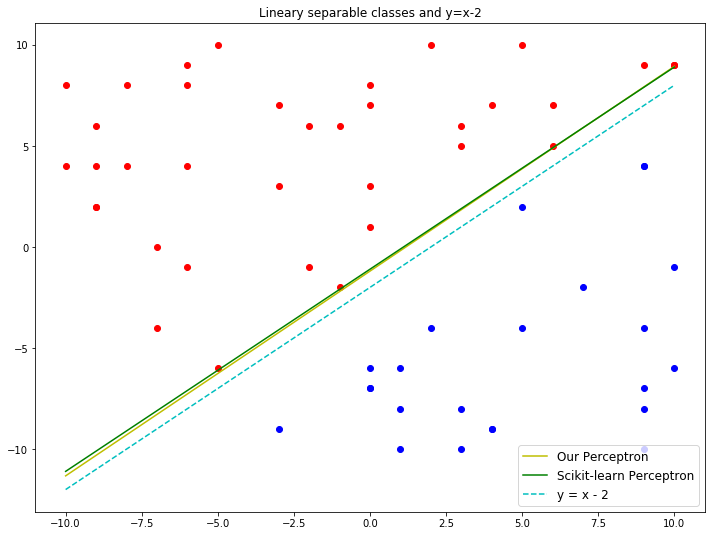

In [39]:
from matplotlib import pyplot as plt
from random import randint
import sklearn.linear_model
from sklearn.model_selection import train_test_split

"""
A little test.
"""    
# 1. Creating dataset: X and y
X = []
y = []
for i in range(0, 60):
    X.append([randint(-10, 10), randint(-10, 10)])

# Case of y = x - 2
for index, point in enumerate(X):
    if point[1] > point[0] - 2:
        plt.plot(point[0], point[1], 'ro')
        y.append(1)
    elif point[1] < point[0] - 2:
        plt.plot(point[0], point[1], 'bo')
        y.append(-1)
    else:
        X[index][1] += 1
        plt.plot(point[0], point[1], 'ro')
        y.append(1)
plt.title("Lineary separable classes and y=x-2")

# Train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=45, test_size=15)

# Prediction: this Perceptron
p = Perceptron(verbose=True)
p.fit(X_train, y_train)
print("This Perceptron test score =", p.score(X_test, y_test))
print("Weights are:", p.coef_[1:], "; intercept =", p.coef_[0])

# Prediction: scikit-learn Perceptron
sk_p = sklearn.linear_model.Perceptron(max_iter=100)
sk_p.fit(X_train, y_train)
print("SK-learn Perceptron test score =", sk_p.score(X_test, y_test))
print("Weights are:", sk_p.coef_, "; intercept =", sk_p.intercept_)

# Plotting boundaries:
x = np.linspace(-10, 10, 10)
sample_boundary, = plt.plot(x, x-2, 'c--', label='y = x - 2')
our_p_boundary,  = plt.plot(x, -1*((p.coef_[0] + x*p.coef_[1])/(p.coef_[2])), 
                            'y-', label='Our Perceptron')
sk_p_boundary,   = plt.plot(x, -1*((sk_p.intercept_[0] + x*sk_p.coef_[0][0])/(sk_p.coef_[0][1])), 
                            'g-', label='Scikit-learn Perceptron')

# Setting up a legend and tuning figure size: 
plt.rcParams["figure.figsize"] = [12, 9]
plt.legend(handles=[our_p_boundary, sk_p_boundary, sample_boundary], prop={'size': 12})
plt.show()